In [6]:
"""
Authors of Python:

Created on Tuesday August 2022

@author: Mithrandir - Şaban Kara

Saban Kara < saban dot kara dot d at tubitak dot gov dot tr >
"""

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression #sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor #decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor #random forest
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import r2_score #r square score 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

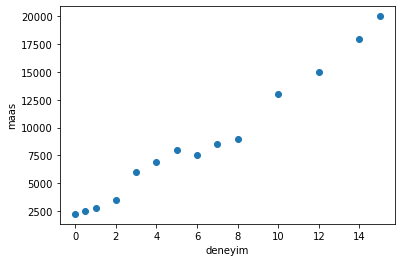

In [6]:
df = pd.read_csv("linear_regression_dataset.csv", sep = ";")

plt.scatter(df.deneyim,df.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")
plt.show()


In [7]:
print ('The shape of df is:', df.shape)

The shape of df is: (14, 2)


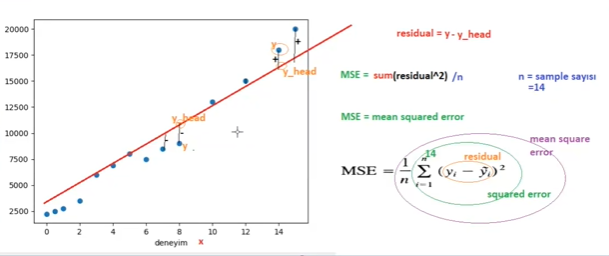

In [84]:
# sklearn

linear_reg = LinearRegression()

x = df.deneyim
y = df.maas
type(x)

pandas.core.series.Series

[ 0.5  0.   1.   5.   8.   4.  15.   7.   3.   2.  12.  10.  14.   6. ]
(14,)
(14, 1)
b0:  [[1663.89519747]]
b0_:  [1663.89519747]  y eksenini kestiği nokta intercept
b1:  [[1138.34819698]]  eğim, slope
11 yıllık deneyim için maas tahmini:  [[14185.72536421]]
11 yıllık deneyim için maas tahmini kısa yol:  [[14185.72536421]]


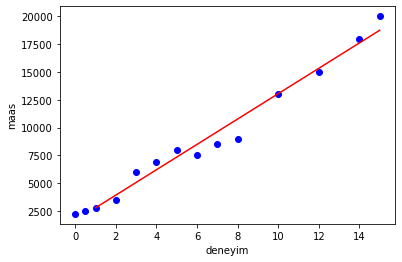

In [85]:
#numpy'a çevirdim
x = df.deneyim.values
y = df.maas.values

print(x)
print(x.shape) #sklearn böyle kullanım kabul etmior

x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)
x.shape #(14,1)
print(x.shape)

linear_reg.fit(x,y)  #katsayıları bulma

b0 = linear_reg.predict([[0]])
print("b0: ", b0)

b0_ = linear_reg.intercept_  #b0 bulmak için, kesişim
print("b0_: ", b0_," y eksenini kestiği nokta intercept") 

b1 = linear_reg.coef_
print("b1: ", b1," eğim, slope")

# maas = 1663 + 1138*deneyim
maas_tahmin = b0_ + b1*11
print("11 yıllık deneyim için maas tahmini: ", maas_tahmin)
print("11 yıllık deneyim için maas tahmini kısa yol: ", linear_reg.predict([[11]]))

array = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  #deneyim

plt.scatter(x,y,color="blue")  #noktaları basıyor
y_head = linear_reg.predict(array)  #maas
plt.xlabel("deneyim")
plt.ylabel("maas")

plt.plot(array, y_head, color ="red") #çizgi çekiyor
plt.show()

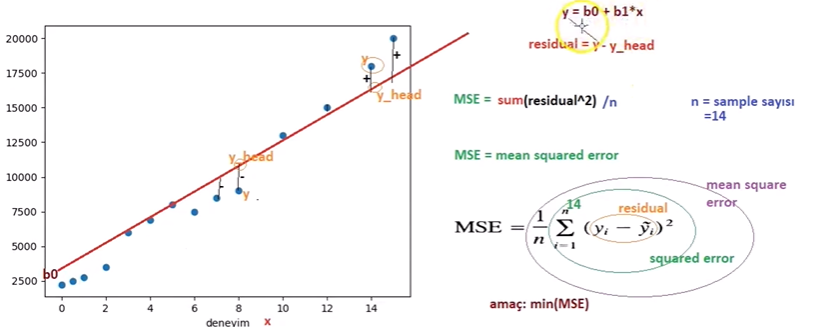

## Multiple Linear Regression

In [86]:
### multiple linear regression

#naas = dependent variable
#deneyim =independent variable

df = pd.read_csv("multiple_linear_regression_dataset.csv", sep = ";")
x = df.iloc[:,[0,2]] #deneyim ve yas
y = df.maas.values.reshape(-1,1)

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y) #katsayıları buluyor

#katsayılar bulundu
print("b0: ", multiple_linear_regression.intercept_)
print("b1, b2: ", multiple_linear_regression.coef_)

print(multiple_linear_regression.predict(np.array([[10,35],[5,35]]))) #deneyim ve yaşa göre

b0:  [10376.62747228]
b1, b2:  [[1525.50072054 -416.72218625]]
[[11046.35815877]
 [ 3418.85455609]]


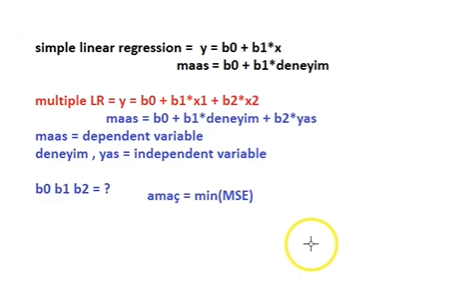

## Polynomial Linear Regression

[[871.66401826]]


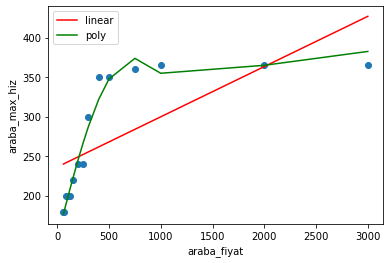

In [87]:
#polynomşal regression = y = b0 + b1*x + b2*x^2 + ... + bn*x^n
#linear regression = y = b0 + b1*x
#multiple linear regression = y = b0 + b1*x1 + b2*x2

df = pd.read_csv("polynomial+regression.csv", sep = ";")

x = df.araba_fiyat.values.reshape(-1,1)
y = df.araba_max_hiz.values.reshape(-1,1) #values arraye çeviriyor

lr = LinearRegression()
lr.fit(x,y) #en uygun line, bunu MSE'ye göre çekiyor

#predict
y_head = lr.predict(x)

print(lr.predict([[10000]])) #bu fiyata çıkan hız
#çok saçma grafik oldu çünkü lineer değil 

polynomial_regression = PolynomialFeatures(degree=5) # x^2 ye kadar al

x_polynomial = polynomial_regression.fit_transform(x)

linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

# print("asfhaksdjf: ",lr.predict([[3000]]))
# print("a_______________: ",linear_regression2.predict([[3000]]))

y_head2 = linear_regression2.predict(x_polynomial)


plt.scatter(x,y) #noktalar
plt.ylabel("araba_max_hiz")
plt.xlabel("araba_fiyat")

plt.plot(x , y_head , color = "red", label ="linear")
plt.plot(x , y_head2 , color = "green", label ="poly")
plt.legend()
plt.show()

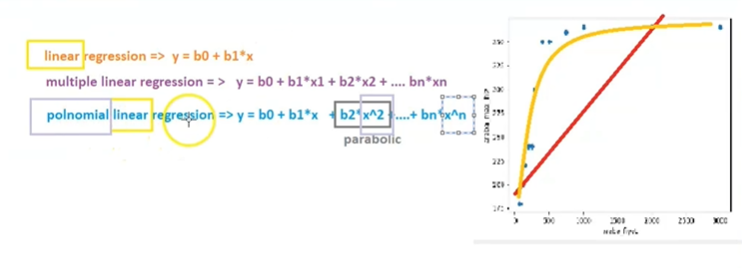

## Decision Tree

No handles with labels found to put in legend.


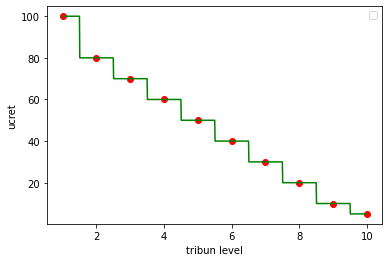

In [88]:

df = pd.read_csv("decision+tree+regression+dataset.csv", sep = ";", header = None)

x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

tree_reg.predict([[5.5]])
x2 = np.arange(min(x), max(x), 0.01).reshape(-1,1)
y_head = tree_reg.predict(x2)

#visualize
plt.ylabel("ucret")
plt.xlabel("tribun level")
plt.scatter(x,y, color = "red")
plt.plot(x2 ,y_head, color = "green")
plt.legend()
plt.show()

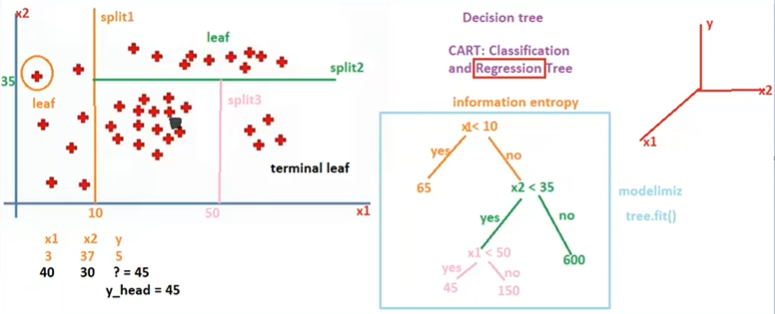

## Random Forest

C:\Users\SABANK~1.D\AppData\Local\Temp/ipykernel_16984/1611857796.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)
No handles with labels found to put in legend.


7.5 seviyesinde ne kadar olduğu:  [28.]


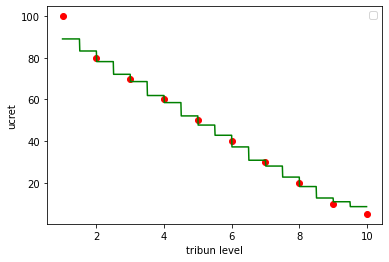

In [89]:

df = pd.read_csv("random+forest+regression+dataset.csv", sep = ";", header = None)

x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=100, random_state=42) #random_state aynı random alınmasını sağlıyor
rf.fit(x,y)
print("7.5 seviyesinde ne kadar olduğu: ", rf.predict([[7.5]]))

x2 = np.arange(min(x), max(x), 0.01).reshape(-1,1)
y_head = rf.predict(x2)

# #visualize
plt.ylabel("ucret")
plt.xlabel("tribun level")
plt.scatter(x,y, color = "red")
plt.plot(x2 ,y_head, color = "green") #x2 yeni tahmin edillmek istenen değerler
                                       #y_head tahmin sonuçları
plt.legend()
plt.show()

#100 tane decision tree kullanıldı


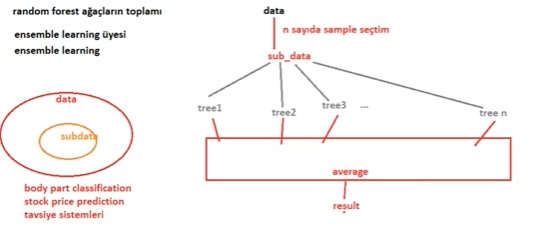

## Evaluation Regression Model
### R-Square with Random Forest

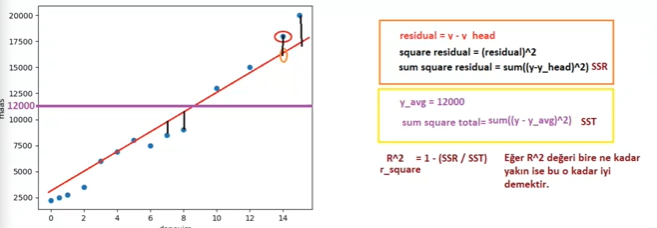

In [90]:
df = pd.read_csv("random+forest+regression+dataset.csv", sep = ";", header = None)

x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

rf = RandomForestRegressor(n_estimators=100, random_state=42) #random_state aynı random alınmasını sağlıyor
rf.fit(x,y)

y_head = rf.predict(x)

print("r_score", r2_score(y,y_head)) #y gerçek değer, y_head tahmin edilen


r_score 0.9798724794092587


C:\Users\SABANK~1.D\AppData\Local\Temp/ipykernel_16984/4267181698.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x,y)


### R-Square with Linear Regression

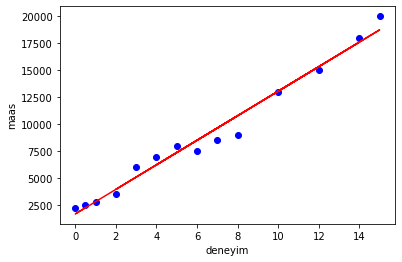

r_score 0.9775283164949902


In [91]:
df = pd.read_csv("linear_regression_dataset.csv", sep = ";")
linear_reg = LinearRegression()

#numpy'a çevirdim
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

linear_reg.fit(x,y)  #katsayıları bulma

plt.scatter(x,y,color="blue")  #noktaları basıyor
y_head = linear_reg.predict(x)  #maas
plt.xlabel("deneyim")
plt.ylabel("maas")

plt.plot(x, y_head, color ="red") #çizgi çekiyor
plt.show()
print("r_score", r2_score(y,y_head)) #y gerçek değer, y_head tahmin edilen

In [92]:
https://www.kaggle.com/code/kanncaa1/deep-learning-tutorial-for-beginners/notebook

SyntaxError: invalid syntax (Temp/ipykernel_16984/3364650514.py, line 1)

### Logistic Regression: Kanser Dataseti

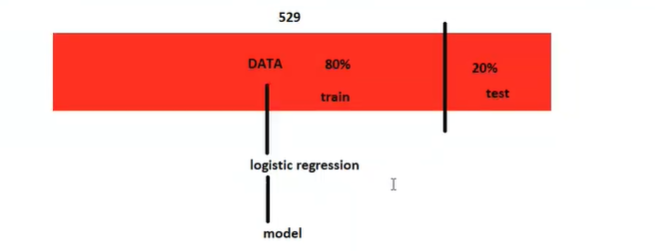

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave points_mean  sym

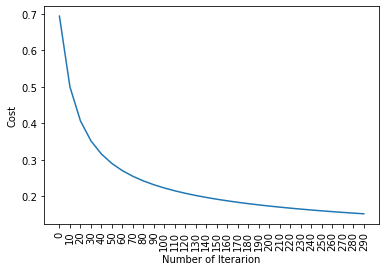

test accuracy: 96.49122807017544 %


In [99]:
data = pd.read_csv("data.csv")
# data.head()

data.drop(["Unnamed: 32","id"], axis=1 , inplace = True) 
#axis=1 tüm satırı yok et, #axis=0 tüm sutünu yok et
# data.head()

#diagnosis değeri numerik olmalı yoksa kullanamam
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
# data.head()

y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1) #diagnosis hari. hepsi

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)- np.min(x_data)).values
print(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_test = x_test.T
x_train = x_train.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

"""

1). X_train - Bu, tüm bağımsız değişkenlerinizi içerir, 
bunlar modeli eğitmek için kullanılacaktır, ayrıca belirttiğimiz gibi,
tüm verilerinizden elde edilen test_size = 0.4bu gözlemler,
modeli eğitmek/uydurmak için kullanılacak ve kalanı test etmek için kullanılacaktır.
modeli.60%40%

2). X_test - Bu, 40%eğitim aşamasında kullanılmayacak ve modelin doğruluğunu test etmek için
tahminler yapmak için kullanılacak verilerden bağımsız değişkenlerin kalan kısmıdır.

3). y_train - Bu, bu model tarafından tahmin edilmesi gereken bağımlı değişkeninizdir,
buna bağımsız değişkenlerinize karşı kategori etiketleri dahildir,
modeli eğitirken/uydururken bağımlı değişkenimizi belirtmemiz gerekir.

4). y_test - Bu veriler, test verileriniz için kategori etiketlerine sahiptir,
bu etiketler gerçek ve tahmin edilen kategoriler arasındaki doğruluğu test etmek için
kullanılacaktır.

"""

def initialize_weights_and_bias(dimension):
    #dimension = 30
    w = np.full((dimension,1),0.01) #matris oluşturuyor
    #w = np.full((5,1),0.01)
    b = 0.0
    return w,b

#w,b= initialize_weight_and_bias(30)
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

print(sigmoid(0))
print(sigmoid(-60))
print(sigmoid(100))
w,b= initialize_weights_and_bias(5)
print("w:",w)
print("b: ",b)



def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = - y_train*np.log(y_head) - (1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1] #x_train.shape[1] is for scalling
    #Cost function is summation of all loss(error)

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias } #dict

    return cost,gradients

#model dediğimiz şey aslında z, güncellenmesi gerekenler w ve b bu duruma aslında train etmek deniyor

# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    #number_of_iterarion: kaç kez ileri geri gidecek
    cost_list = [] #tüm costları depolamak için
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:  #her 10 adımda bir costları depola canım istedi
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)



# prediction
#predic edeceğim şey x_test zaten
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b) #dot matris çarpımına denk geliyor
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    #y_train karşılaştırma için
    dimension = x_train.shape[0]  # that is 30
    w, b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test) #kanser iyi huylu mu kötü huylu mu
    #y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train) #deep learning seviyesi bir şey bu

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    #rint("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))


logistic_regression(x_train, y_train, x_test, y_test, learning_rate=1, num_iterations=300)


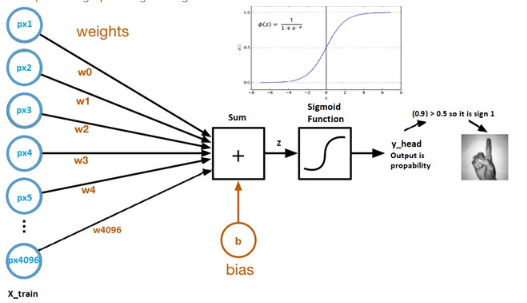

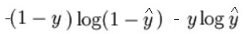

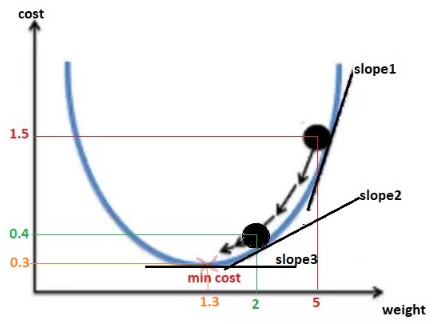

In [94]:
#130 satırda yaptığımız kodu birkaç satırda yapacağız
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T, y_train.T)
print("test accuracy {}".format(lr.score(x_test.T, y_test.T))) #predict et daha sonra accuracy değeri bul


test accuracy 0.9824561403508771


##  K-Nearest Neighbour(KNN) Classificaiton

In [95]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)
data.tail()
# M kötü huyulu tümör
# B iyi huylu tümör


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


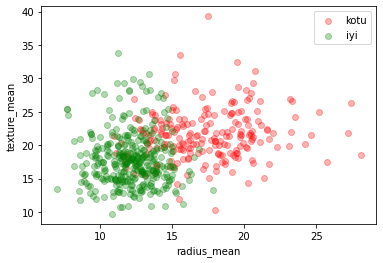

In [96]:
#scatter plot
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

plt.scatter(M.radius_mean , M.texture_mean, color ="red",label="kotu", alpha = 0.3)
plt.scatter(B.radius_mean , B.texture_mean, color ="green",label="iyi" , alpha = 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

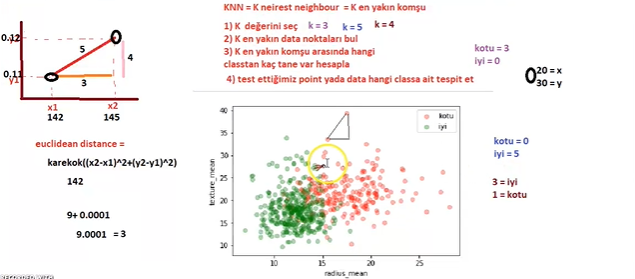

 3 nn score: 0.9532163742690059


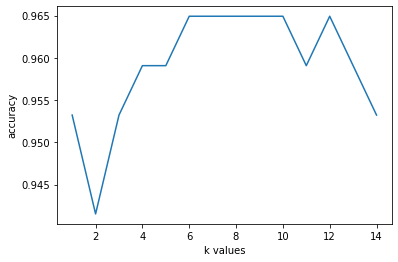

In [97]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values #numpy formatına çekti
x_data = data.drop(["diagnosis"], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#knn model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {}".format(3 , knn.score(x_test,y_test)))


#knn de sıkıntı şu en iyi skor için manuel olarak tek tek bakmak gerekiyor

#find k value

score_list = [] #boş liste oluşturdum
for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
x = range(1,15)
plt.plot(x, score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

#buradaki en iyi sonuç 6 ile 10 arasında max score alınabiliyor

###  SVM = SUPPORT VECTOR MACHINE

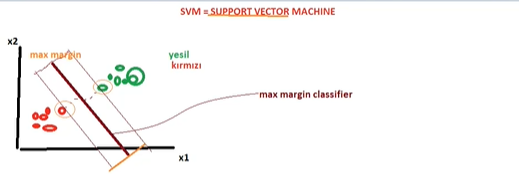

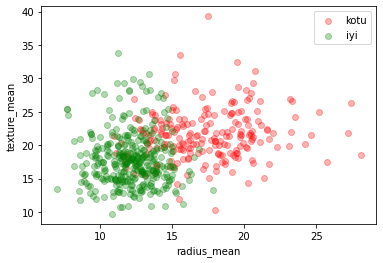

accuracy of svm score:  0.9649122807017544


In [98]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)
data.tail()
#data.info()

M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

plt.scatter(M.radius_mean , M.texture_mean, color ="red",label="kotu", alpha = 0.3)
plt.scatter(B.radius_mean , B.texture_mean, color ="green",label="iyi" , alpha = 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values #numpy formatına çekti
x_data = data.drop(["diagnosis"], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(x_train,y_train)
print("accuracy of svm score: ", svm.score(x_test,y_test))


### Naive Bayes Classification

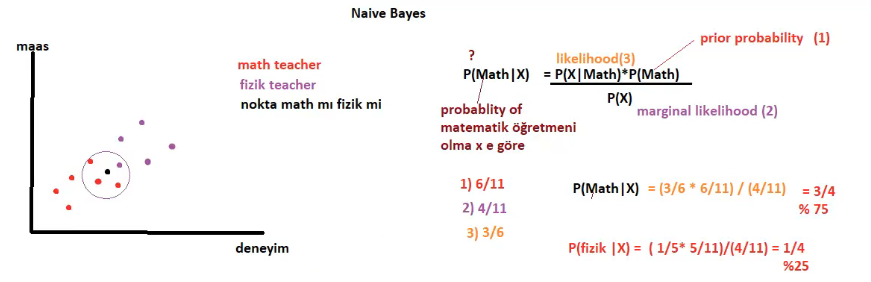

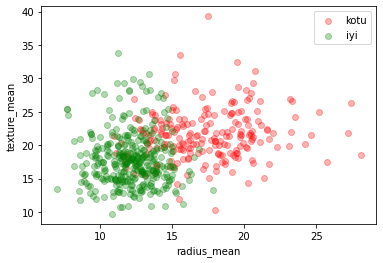

accuracy of naive bayes score:  0.935672514619883


In [5]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)
data.tail()

M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

plt.scatter(M.radius_mean , M.texture_mean, color ="red",label="kotu", alpha = 0.3)
plt.scatter(B.radius_mean , B.texture_mean, color ="green",label="iyi" , alpha = 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values #numpy formatına çekti
x_data = data.drop(["diagnosis"], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("accuracy of naive bayes score: ", nb.score(x_test,y_test))

### Decision Tree Classification

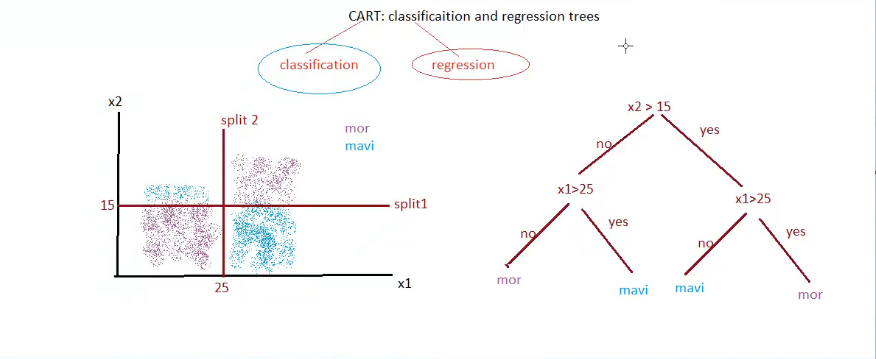

In [24]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)
# data.tail()
#data.info()

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values #numpy formatına çekti
x_data = data.drop(["diagnosis"], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

score:  0.9069767441860465


### Random Forest Classification

In [12]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)
# data.tail()
#data.info()

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values #numpy formatına çekti
x_data = data.drop(["diagnosis"], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)

print("score: ", rf.score(x_test,y_test))

score:  0.9534883720930233


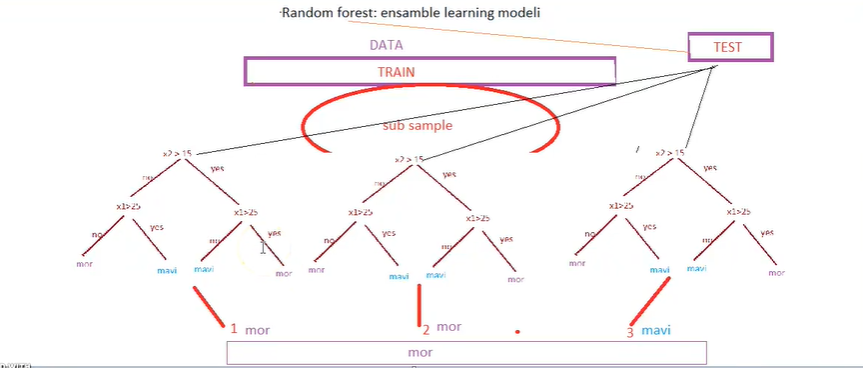

### Confusion Matrix

score:  0.9534883720930233


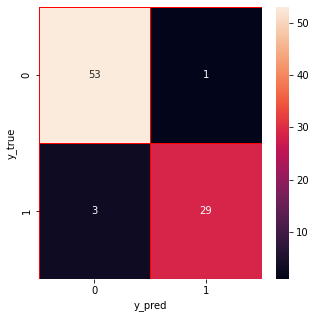

In [11]:
data = pd.read_csv("data.csv")
data.drop(["id","Unnamed: 32"], axis=1, inplace=True)
# data.tail()
#data.info()

data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values #numpy formatına çekti
x_data = data.drop(["diagnosis"], axis = 1)

#normalization
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)


print("score: ", rf.score(x_test,y_test))

y_pred = rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visiual


f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm , annot = True, linewidths = 0.5, linecolor = "red", fmt= ".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

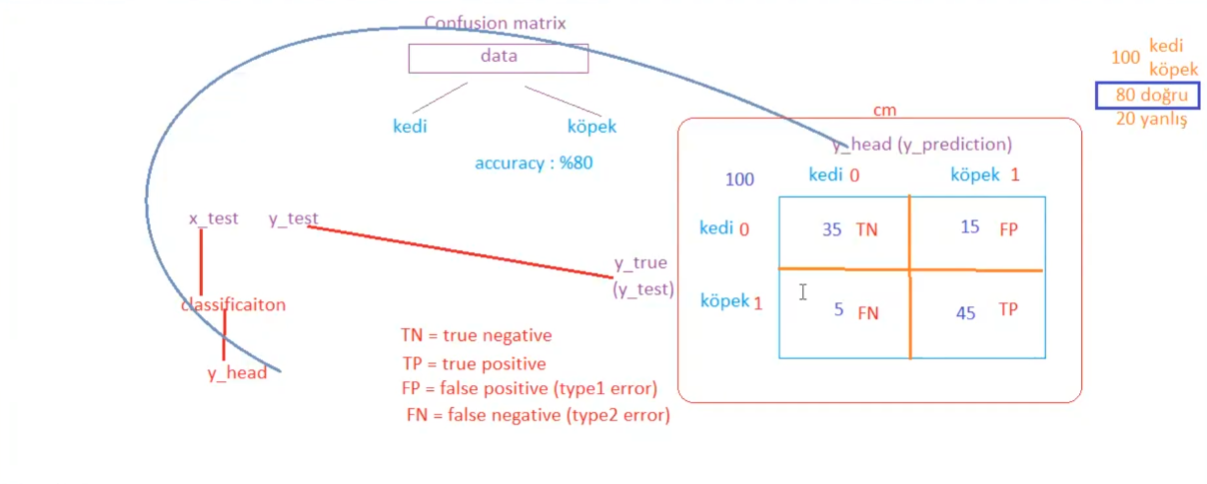

### K Means Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


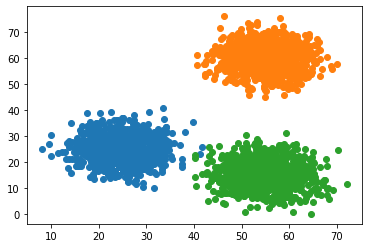

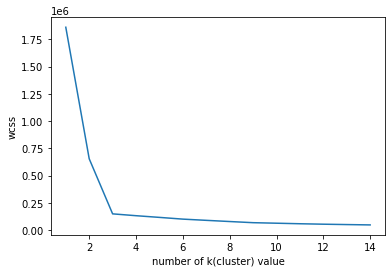

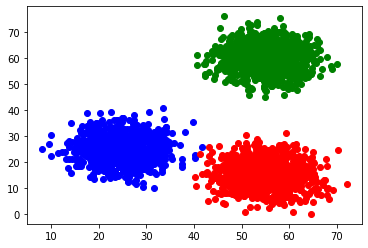

In [14]:
#kendi datasetimi hazırlıyorum

#class 1
x1 = np.random.normal(25,5,1000) #25 ortalamalo, 5 sigmalı, 1000 normal dağılımlı gauss örneği
y1 = np.random.normal(25,5,1000)

#class 2
x2 = np.random.normal(55,5,1000) 
y2 = np.random.normal(60,5,1000)

#class 3
x3 = np.random.normal(55,5,1000) 
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3), axis=0) #birleştirdi
y = np.concatenate((y1,y2,y3), axis=0)

dictionary = {"x":x, "y":y}
data = pd.DataFrame(dictionary)

data.info()
data.describe()

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show() #3 tane class olduğunu görüyorum bunu datanın kendisi bilmiyor ben biliyorum

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  #çift toplam işlemi inertia
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k(cluster) value")
plt.ylabel("wcss")
plt.show()

#şimdi 3 olduğunu anladık

kmeans2 = KMeans(n_clusters=3)
clusters =kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label ==0 ], data.y[data.label ==0 ], color = "green")
plt.scatter(data.x[data.label ==1 ], data.y[data.label ==1 ], color = "blue")
plt.scatter(data.x[data.label ==2 ], data.y[data.label ==2 ], color = "red")
#plt.scatter(data.x[data.label ==3 ], data.y[data.label ==3 ], color = "yellow") # for n_cluster=4
plt.show()

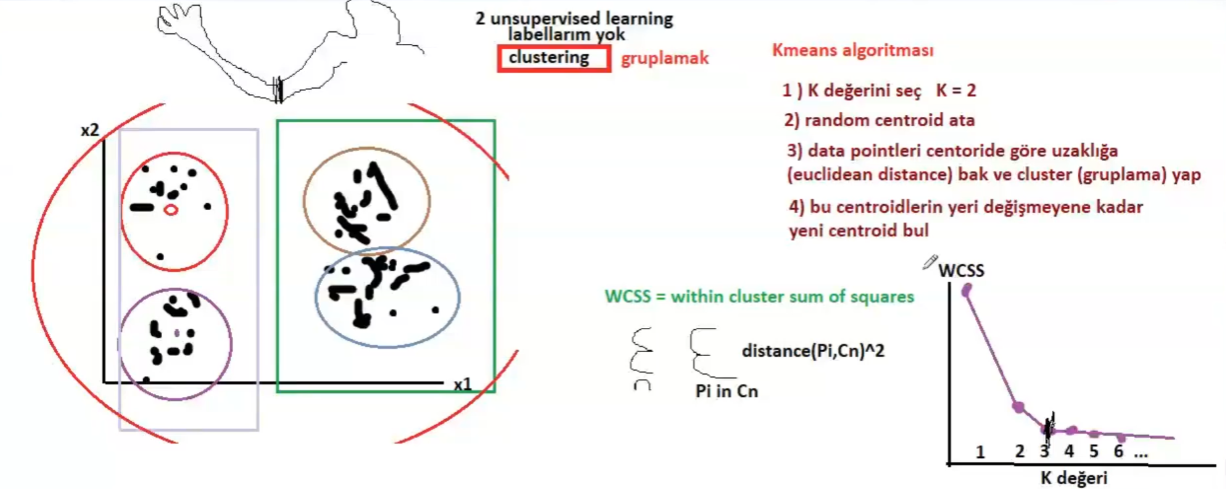

### Hierarcial Clustering

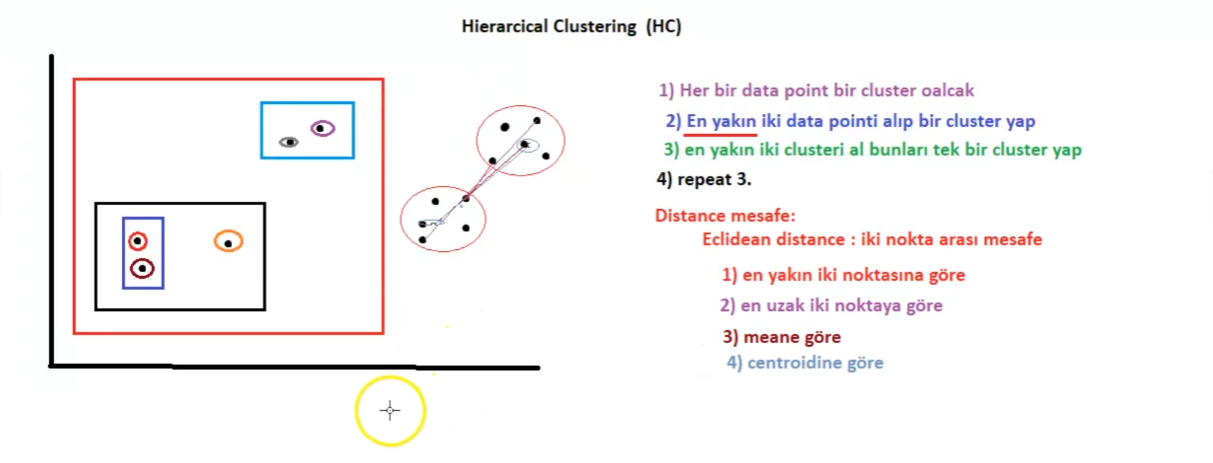

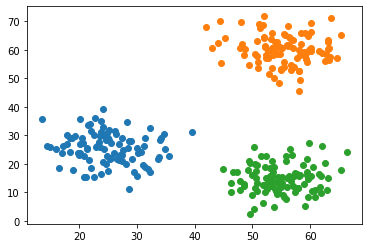

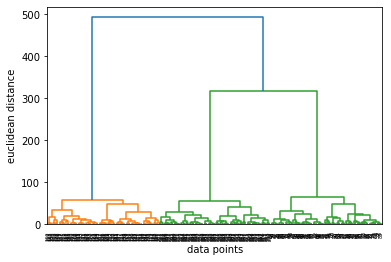

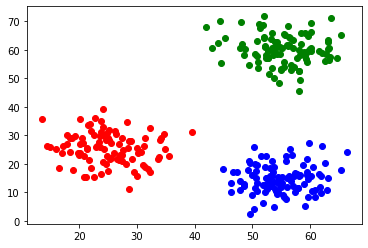

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 22 01:50:15 2018

@author: user
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset

# class1
x1 = np.random.normal(25,5,100)
y1 = np.random.normal(25,5,100)

# class2
x2 = np.random.normal(55,5,100)
y2 = np.random.normal(60,5,100)

# class3
x3 = np.random.normal(55,5,100)
y3 = np.random.normal(15,5,100)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()


# %% dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# %% HC
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(data)

data["label"] = cluster

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.show()


## NLP(Natural Language Process)

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 14 13:13:34 2018

@author: kcy
"""
import pandas as pd

# %% import twitter data
data = pd.read_csv(r"gender_classifier.csv",encoding = "latin1")
data = pd.concat([data.gender,data.description],axis=1)
data.dropna(axis = 0,inplace = True)
data.gender = [1 if each == "female" else 0 for each in data.gender]

#%% clening data 
# regular expression RE mesela "[^a-zA-Z]"
import re

first_description = data.description[4]
description = re.sub("[^a-zA-Z]"," ",first_description)  # a dan z ye ve A dan Z ye kadar olan harfleri bulma geri kalanları " " (space) ile degistir
description = description.lower()   # buyuk harftan kucuk harfe cevirme

# %% stopwords (irrelavent words) gereksiz kelimeler
import nltk # natural language tool kit
nltk.download("stopwords")      # corpus diye bir kalsore indiriliyor
from nltk.corpus import stopwords  # sonra ben corpus klasorunden import ediyorum

# description = description.split()

# split yerine tokenizer kullanabiliriz
description = nltk.word_tokenize(description)

# split kullanırsak "shouldn't " gibi kelimeler "should" ve "not" diye ikiye ayrılmaz ama word_tokenize() kullanirsak ayrilir
# %%
# greksiz kelimeleri cikar
description = [ word for word in description if not word in set(stopwords.words("english"))]
  
# %%             
# lemmatazation loved => love   gitmeyecegim = > git

import nltk as nlp

lemma = nlp.WordNetLemmatizer()
description = [ lemma.lemmatize(word) for word in description] 

description = " ".join(description)

#%% 
description_list = []
for description in data.description:
    description = re.sub("[^a-zA-Z]"," ",description)
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    description = nltk.word_tokenize(description)
    #description = [ word for word in description if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)

# %% bag of words

from sklearn.feature_extraction.text import CountVectorizer # bag of words yaratmak icin kullandigim metot
max_features = 5000

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x

print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

# %%
y = data.iloc[:,0].values   # male or female classes
x = sparce_matrix
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)


# %% naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#%% prediction
y_pred = nb.predict(x_test)

print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ŞBN07\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ŞBN07/nltk_data'
    - 'C:\\Users\\Public\\anaconda3\\nltk_data'
    - 'C:\\Users\\Public\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Public\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ŞBN07\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


## PCA - Principal Companent Analysis

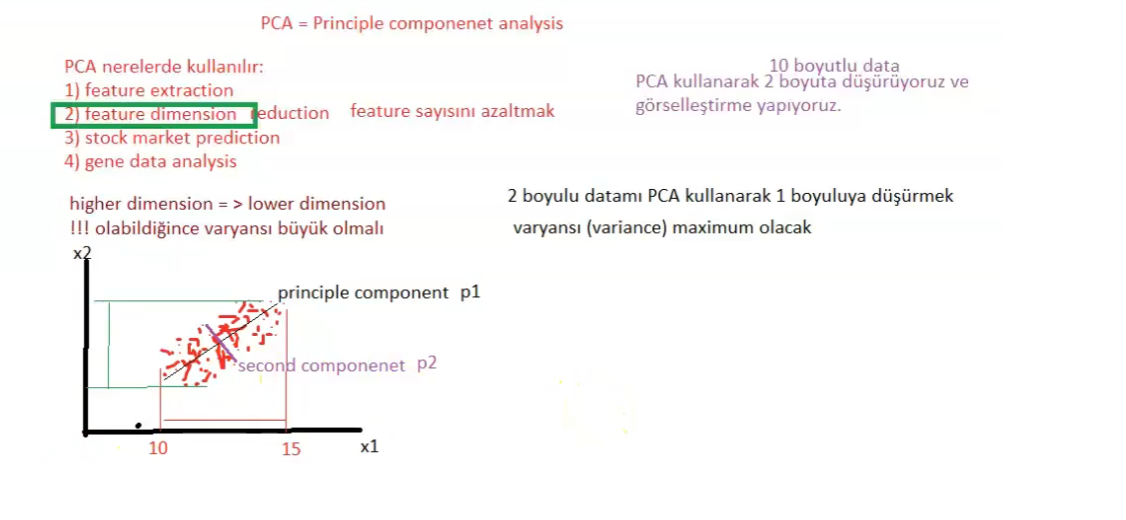

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


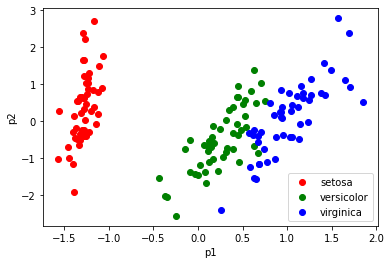

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# %%
iris = load_iris()

data = iris.data
feature_names = iris.feature_names
y = iris.target

df = pd.DataFrame(data,columns = feature_names)
df["sinif"] = y

x = data

#%% PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)

print("sum: ",sum(pca.explained_variance_ratio_))

#%% 2D

df["p1"] = x_pca[:,0]
df["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(df.p1[df.sinif == each],df.p2[df.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()

# Model Selection

## K-Fold Cross Validation

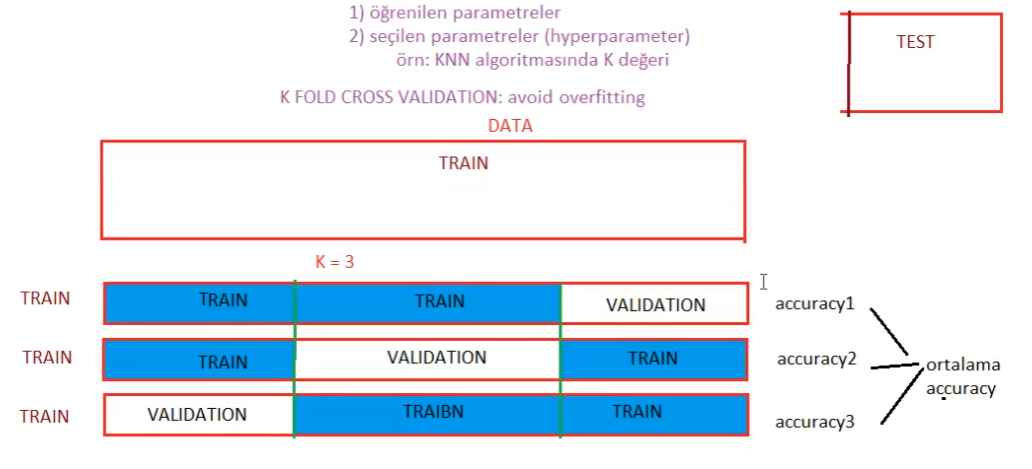

In [ ]:
85 ten devam et

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 14 23:53:33 2018

@author: user
"""

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

#%%
iris = load_iris() #data bu

x = iris.data
y = iris.target

# %% normalization
x = (x-np.min(x))/(np.max(x)-np.min(x))

# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3)

#%% knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # k = n_neighbors

# %% K fold CV K = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = x_train, y= y_train, cv = 10)
print("average accuracy: ",np.mean(accuracies))
print("average std: ",np.std(accuracies))

#%% 
knn.fit(x_train,y_train)
print("test accuracy: ",knn.score(x_test,y_test))


# %% grid search cross validation for knn

from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knn= KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10)  # GridSearchCV
knn_cv.fit(x,y)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn_cv.best_score_)

# %% Grid search CV with logistic regression

x = x[:100,:]
y = y[:100] 

from sklearn.linear_model import LogisticRegression

grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}  # l1 = lasso ve l2 = ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv = 10)
logreg_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ",logreg_cv.best_params_)
print("accuracy: ",logreg_cv.best_score_)


average accuracy:  0.99
average std:  0.029999999999999992
test accuracy:  0.9333333333333333
tuned hyperparameter K:  {'n_neighbors': 13}
tuned parametreye gore en iyi accuracy (best score):  0.9800000000000001


C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\saban.kara.d\Anaconda3\lib\site-

tuned hyperparameters: (best parameters):  {'C': 0.001, 'penalty': 'l2'}
accuracy:  1.0


C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\saban.kara.d\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\saban.kara.d\Anaconda3\lib\site-

In [ ]:
https://docs.google.com/forms/d/e/1FAIpQLSdYlX3qmyZ8Go4VaWjBGzpe63dxrA3YfnfsjsuNiWp-GSug3g/formResponse